<a href="https://colab.research.google.com/github/sarithamiryala/ANN_implementation/blob/main/tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
tf.__version__


'2.17.0'

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi

Tue Nov  5 10:30:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
tf.keras.__version__

'3.4.1'

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
x_train_full.shape

(60000, 28, 28)

In [9]:
img = x_train_full[0]

In [10]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [11]:
img.shape

(28, 28)

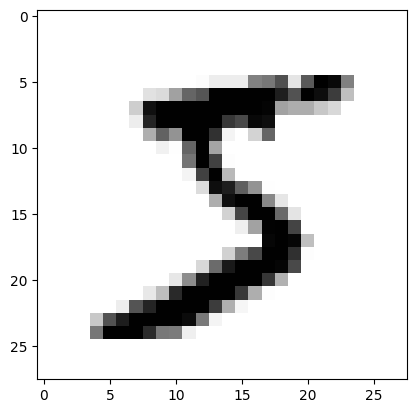

In [12]:
plt.imshow(img, cmap='binary')

<Axes: >

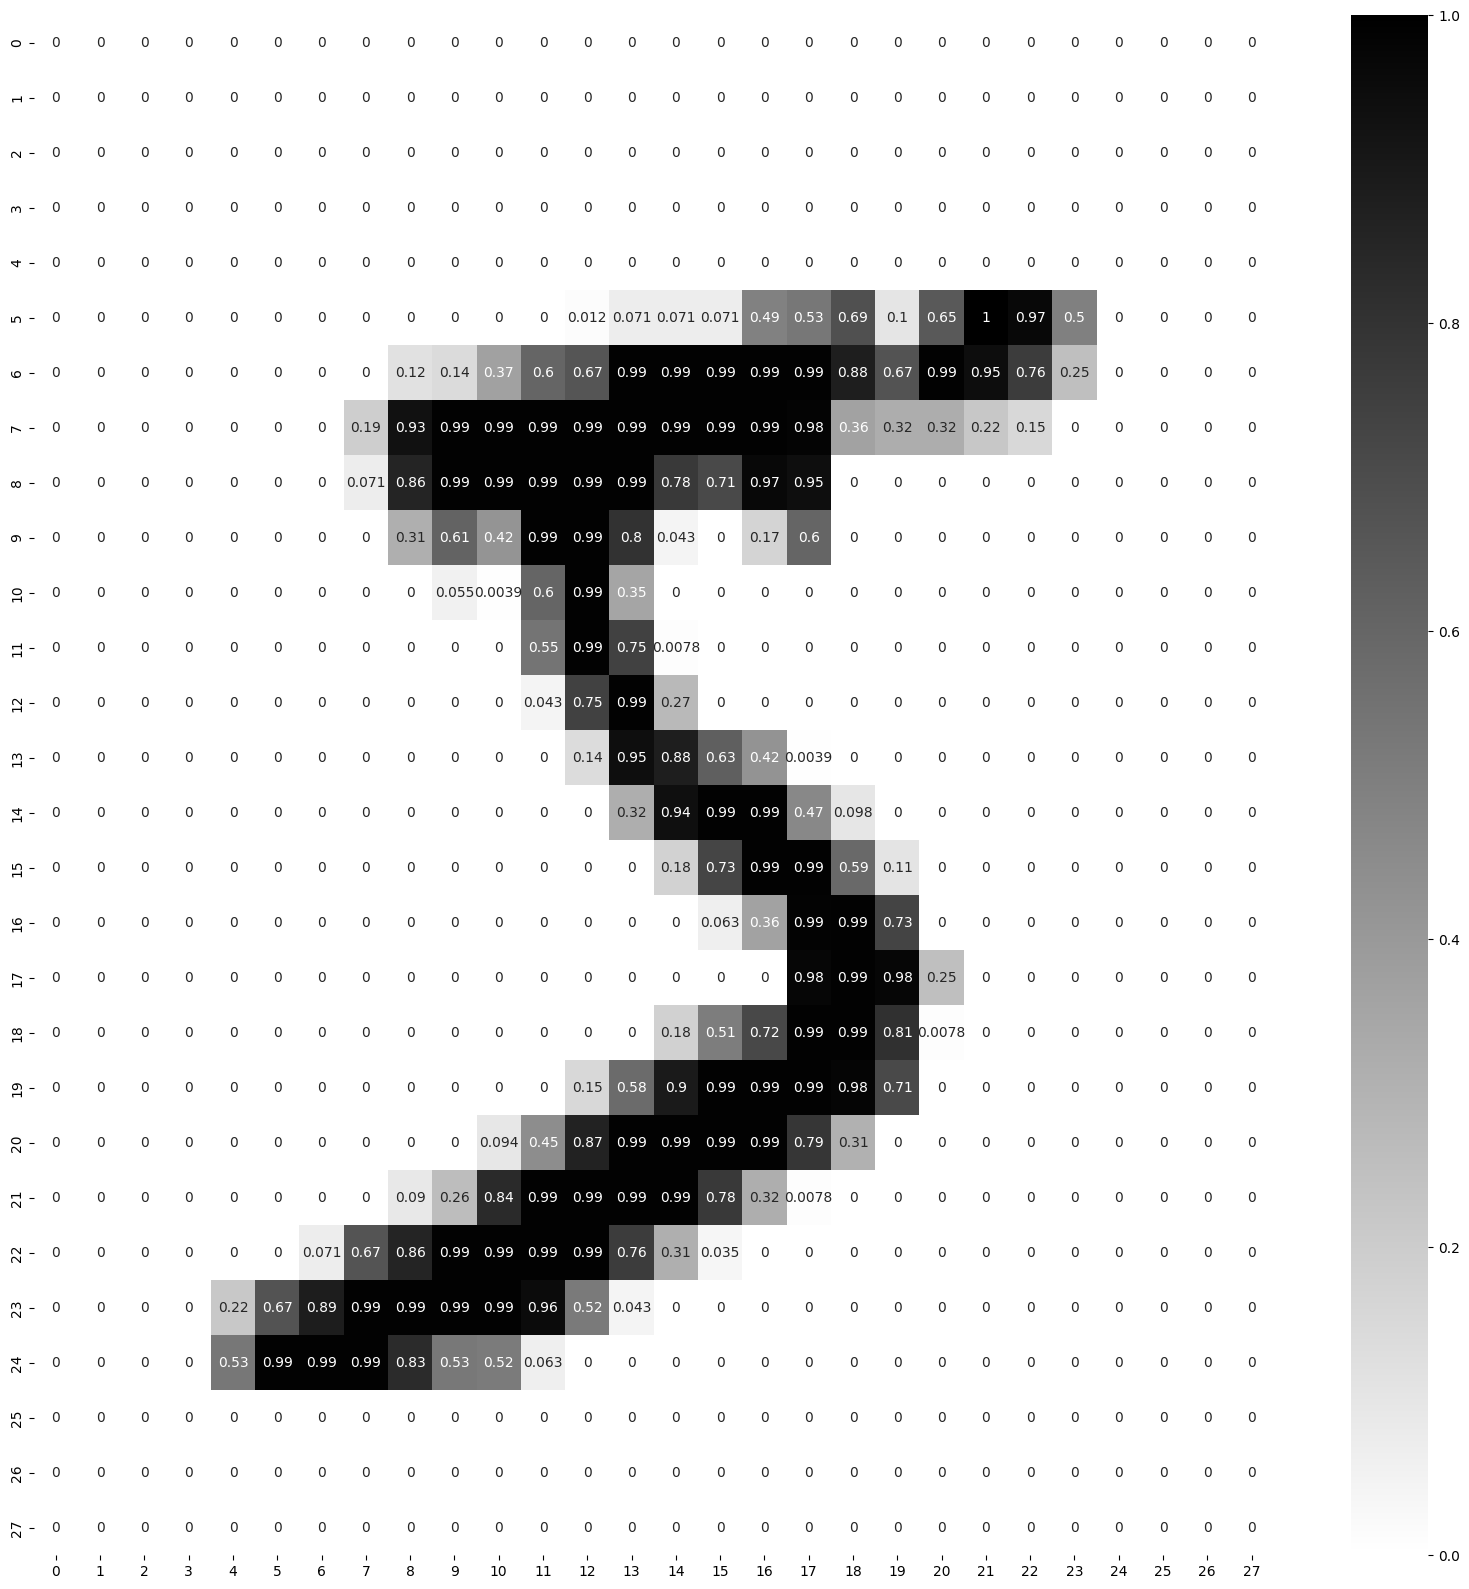

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True,cmap='binary')

In [14]:
X_valid , X_train = x_train_full[:5000] /255, x_train_full[5000:] /255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
x_test = x_test /255

In [36]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape =(28,28), name = "input_layer"),
    tf.keras.layers.Dense(300, activation='relu', name = "hidden_layer1"),
    tf.keras.layers.Dense(100,activation= 'relu', name = "hidden_layer2"),
    tf.keras.layers.Dense(10, activation='softmax', name= "output_layer")
]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [38]:
model_clf.layers

[<Flatten name=input_layer, built=True>,
 <Dense name=hidden_layer1, built=True>,
 <Dense name=hidden_layer2, built=True>,
 <Dense name=output_layer, built=True>]

In [39]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Flatten)                │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model_clf.layers

[<Flatten name=input_layer, built=True>,
 <Dense name=hidden_layer1, built=True>,
 <Dense name=hidden_layer2, built=True>,
 <Dense name=output_layer, built=True>]

In [41]:
model_clf.layers[1].name

'hidden_layer1'

In [42]:
model_clf.layers[1].get_weights()

[array([[ 0.06600195, -0.03689759,  0.04888459, ...,  0.07274263,
         -0.04422267,  0.02578832],
        [-0.02421671, -0.03996442, -0.04194181, ...,  0.04255206,
         -0.02563634, -0.04066626],
        [-0.07218616,  0.0305112 ,  0.06129269, ..., -0.0279672 ,
          0.00715456, -0.06135582],
        ...,
        [-0.00617875,  0.05143946,  0.0295477 , ...,  0.07159811,
          0.06950763,  0.07074979],
        [-0.0373978 , -0.00683939, -0.02901799, ...,  0.06607294,
          0.00975314,  0.05855495],
        [-0.02765324,  0.0442215 ,  0.05926087, ..., -0.03876161,
         -0.00962855,  0.04423448]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [43]:
weights , biases = model_clf.layers[1].get_weights()

In [44]:
weights

array([[ 0.06600195, -0.03689759,  0.04888459, ...,  0.07274263,
        -0.04422267,  0.02578832],
       [-0.02421671, -0.03996442, -0.04194181, ...,  0.04255206,
        -0.02563634, -0.04066626],
       [-0.07218616,  0.0305112 ,  0.06129269, ..., -0.0279672 ,
         0.00715456, -0.06135582],
       ...,
       [-0.00617875,  0.05143946,  0.0295477 , ...,  0.07159811,
         0.06950763,  0.07074979],
       [-0.0373978 , -0.00683939, -0.02901799, ...,  0.06607294,
         0.00975314,  0.05855495],
       [-0.02765324,  0.0442215 ,  0.05926087, ..., -0.03876161,
        -0.00962855,  0.04423448]], dtype=float32)

In [45]:
weights.shape

(784, 300)

In [46]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [47]:
biases.shape

(300,)

In [48]:
Loss_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

In [49]:
model_clf.compile(loss=Loss_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [51]:
EPOCHS =30
VALIDATION = (X_valid,y_valid)

history = model_clf.fit(X_train,y_train,
              epochs=EPOCHS,
              validation_data=VALIDATION,
              )

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9940 - loss: 0.0255 - val_accuracy: 0.9788 - val_loss: 0.0714
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9948 - loss: 0.0242 - val_accuracy: 0.9780 - val_loss: 0.0720
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9955 - loss: 0.0231 - val_accuracy: 0.9786 - val_loss: 0.0718
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9956 - loss: 0.0220 - val_accuracy: 0.9798 - val_loss: 0.0712
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9962 - loss: 0.0209 - val_accuracy: 0.9788 - val_loss: 0.0709
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9962 - loss: 0.0198 - val_accuracy: 0.9788 - val_loss: 0.0716
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9971 - loss: 0.0190 - val_accuracy: 0.9794 - val_loss: 0.0715
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9972 - loss: 0.0173 - 

In [53]:
type(history.history)

dict

In [54]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [55]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.994055,0.026523,0.9788,0.071427
1,0.994382,0.025124,0.9780,0.071955
2,0.995073,0.023523,0.9786,0.071810
3,0.995400,0.022305,0.9798,0.071233
4,0.995891,0.020998,0.9788,0.070903
5,0.996109,0.020042,0.9788,0.071588
6,0.996891,0.018922,0.9794,0.071499
7,0.997036,0.017844,0.9784,0.071919
8,0.997473,0.016973,0.9786,0.070461
9,0.997509,0.016170,0.9794,0.071389


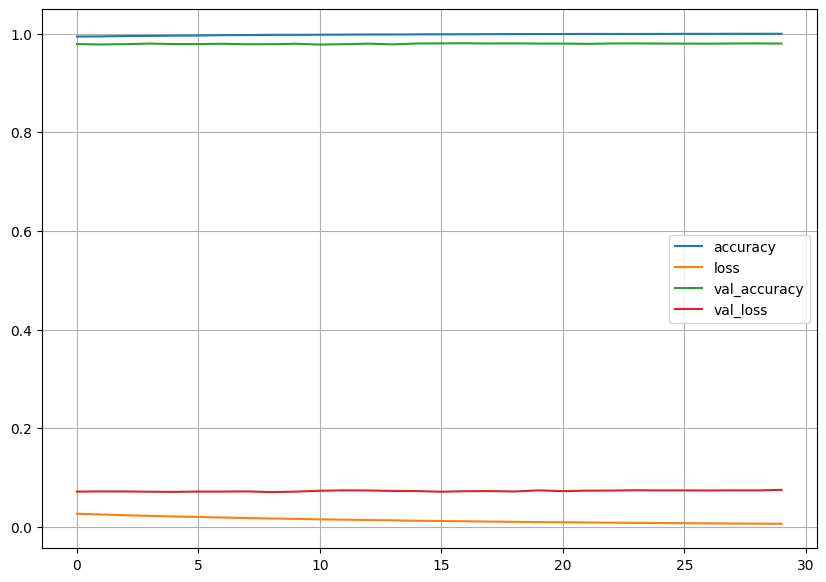

In [58]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)

plt.show()

In [60]:
model_clf.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.0849


[0.07049258798360825, 0.9800999760627747]

In [61]:
model_clf.save("model_clf.h5")